<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#EDA-Intro" data-toc-modified-id="EDA-Intro-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA Intro</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Model-Cleaning-1:-Variable-type" data-toc-modified-id="Model-Cleaning-1:-Variable-type-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Cleaning 1: Variable type</a></span></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Assignment</a></span></li><li><span><a href="#Data-Cleaning-2:-Missing-Values" data-toc-modified-id="Data-Cleaning-2:-Missing-Values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Cleaning 2: Missing Values</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Data-Cleaning-3:-Outliers" data-toc-modified-id="Data-Cleaning-3:-Outliers-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Cleaning 3: Outliers</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Data-Exploration-#1" data-toc-modified-id="Data-Exploration-#1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Exploration #1</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Data-Exploration-#2" data-toc-modified-id="Data-Exploration-#2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Exploration #2</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Feature-Engineering-1" data-toc-modified-id="Feature-Engineering-1-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Feature Engineering 1</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li><li><span><a href="#Feature-Engineering-2:-Dimensionality" data-toc-modified-id="Feature-Engineering-2:-Dimensionality-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Engineering 2: Dimensionality</a></span></li><li><span><a href="#Modeling-Purpose" data-toc-modified-id="Modeling-Purpose-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Modeling Purpose</a></span><ul class="toc-item"><li><span><a href="#Assignment" data-toc-modified-id="Assignment-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Assignment</a></span></li></ul></li></ul></div>

# Imports

In [16]:
import pandas as pd
import numpy as np
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
pd.set_option('display.max_columns', None)

# EDA Intro

EDA (Exploratory Data Analysis) is the first step to a Data science pipeline. Involves three main components: Clean, Explore, Feature Engineer.

Clean: Fix any problems with initial dataset. (changing datatypes, remove NANs, string replacements)

Explore: Create visualizations and statistics to show relationships between features.

Feature Engineering: Choosing most relevant features and creating new features base upon them.

## Assignment

1. What is the goal of EDA (exploratory data analysis)?
    -  Indentify and prepare features to be used for modeling
    
    
2. Suppose that you are given a dataset of customer product reviews for an e-commerce company. Each review is scored as a Likert-style survey item where 1 indicates a negative sentiment about the product and a 5 is positive. These reviews are collected on the company's website. 

    a. What problems do you expect to find in the raw data? 
        
        - Answers may be above the rating scale, come in the form of strings or floats and possibply numerically written out. There may also be trailing whitespace or random special characters.
    
    b. If your task is to build features that give information about customer sentiments, how would you approach this task and what kind of methods would you apply to accomplish it? 

        - Each product feature or review feature could have an average rating column. If the e-commerce company has multiple categories of products, averaging the ratings for each category could be useful. 
    
    c. Try to identify some potentially useful features that you might derive from the raw data. How would you derive them and how would you assess the usefulness of those features?
        
        - Depends on the purpose of the model. If the model is used for predicting the products rating, then splitting each product into different categories (e.g. fashion, gadgets, etc) and then using the categories desired for training.  

# Model Cleaning 1: Variable type

Zero point: Where measurement starts (ratio). The point where postive and negative separate (interval).

Continous datatypes:
    - Interval: Distance between points are standardized and scaled. No defined zero point which means data can't be multiplied or divided. (ex. temperature)  
    - Ratio: There is an absolute zero point. Which means no negative data. 

# Assignment

1. Consider the advantages and disadvantages of treating the Rank variable as categorical. Discuss your arguments with your mentor.
    
    - Using rating as categorical, each channel can be grouped into: top rankings, midranking and low ranking channels. For data exploration, the groups can be visualized separately to see the contrast between features. If the data is grouped by another feature, then numerical ratings should be used. Ratings could then be used for statistical analysis.
    
    
2. What are the types of the following variables?

    * Age: Continous ratio

    * Salary: Continous ratio

    * Revenue: Continous ratio

    * Customer type: Nominal categorical

    * Stock price: Continous ratio

# Data Cleaning 2: Missing Values

Approach to missing values:
    - Delete rows with nans: Use as last resort and only if dataset is large enough where dropping those rows wouldn't have a significant effect on data. 

    - Imputation: Fill nans with central tendency metrics. 
    - Interpolation: Use value from similar rows. Used commonly with time series data but can be used with categorical data. Data must be meaningfully ordered in order to fill nans with accurate numerical or categorical estimate. 


## Assignment

In [18]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

1. Determine all the variable types and find the fraction of the missing values for each variable.

In [19]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [20]:
edu_df.isnull().sum()*100 / edu_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [21]:
edu_math_df = edu_df[['STATE', 'YEAR', 'AVG_MATH_4_SCORE']].copy()

2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [22]:
edu_math_df['imputation_mean'] = edu_math_df.groupby('STATE')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.

In [23]:
edu_math_df['imputation_year_mean'] = edu_math_df.groupby('YEAR')['AVG_MATH_4_SCORE'].transform(lambda x: x.fillna(x.mean()))

4. This time, fill in the missing values using interpolation (extrapolation).

What are the differences between these two interpolations? How does the second avoid using nans for rows that are at the bottom of the feature?

In [24]:
edu_math_df['interpolation_linear'] = edu_math_df.groupby('STATE')['AVG_MATH_4_SCORE'].apply(lambda x: x.interpolate(limit_direction='backward'))

In [25]:
edu_math_df['test'] = edu_math_df.loc[:, 'AVG_MATH_4_SCORE'].interpolate()

In [26]:
edu_math_df[edu_math_df.STATE=='HAWAII']

,STATE,YEAR,AVG_MATH_4_SCORE,imputation_mean,imputation_year_mean,interpolation_linear,test
11,HAWAII,1992,214.056666,214.056666,214.056666,214.056666,214.056666
63,HAWAII,1993,NaN,229.973868,NaN,214.283890,224.334760
116,HAWAII,1994,NaN,229.973868,NaN,214.511114,219.728920
168,HAWAII,1995,NaN,229.973868,NaN,214.738338,215.209982
220,HAWAII,1996,214.965562,214.965562,214.965562,214.965562,214.965562
271,HAWAII,1997,NaN,229.973868,NaN,215.185871,224.720845
323,HAWAII,1998,NaN,229.973868,NaN,215.406180,231.328495
375,HAWAII,1999,NaN,229.973868,NaN,215.626489,236.217624
427,HAWAII,2000,215.846799,215.846799,215.846799,215.846799,215.846799
479,HAWAII,2001,NaN,229.973868,NaN,219.509402,228.576805


5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

The nans that were replaced using state mean imputation for earlier years within the times series were larger than the other methods. Seeing the steady increase overtime in time series, this method seems to be inaccurate at filling nans that align with this steady increase. 

The year mean imputation method was ineffective for rows within years that all states had nans for that particular year. 

The state linear interpolation was the most effective and accurate method to fill nans. The interpolation filled nans with values that followed the steady increase. Even if there were consecutive years with nans, the linear interpolation filled those consecutive nans. 

# Data Cleaning 3: Outliers

Whiskers: Points between the outside of interquartiles and fliers. Set whisker's threshold by standard deviations away from 1st/3rd quartile

Fliers on boxplot = outliers

____Handling Outliers:____

__Drop outliers__:
Drop if:

- Outlier is result of error in data collection
- Dropping outlier makes no meaningful change in overall data
- No other solution

__Z-score threshold:__

1. Scale data to mean=0 and std=1
2. Set threshold (point has to be greater than x thresholds away from the mean to be considered an outlier)

__Turkey method:__

Any points that are 1.5 (default) times larger or smaller than the interquartile are considered outliers.

iqr (interquartile0 = q75 - q25

min value threshold = q25 - iqr * 1.5

min value threshold = q75 + iqr * 1.5

outliers = x > min thresh or x > max thresh

__Winsorization:__

Cap outlier at a specific limit. Use scipy winsorize method to set lower/higher limit by setting tuple parameters. Tuple = (lower pct to cap (e.g. 5 = set all values lower than the lowest 5 percentile to the 5 percentile value), higher pct to cap)

__Transform outlier:__

Transform data using mono/log/sqrt transformation. Scales/elimate outliers. Commonly used when data is not normally distributed.



In [27]:
fill_col = list(edu_df.columns[3:])

for col in fill_col:
    edu_df.loc[:, col].interpolate(inplace=True)
    

## Assignment

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?

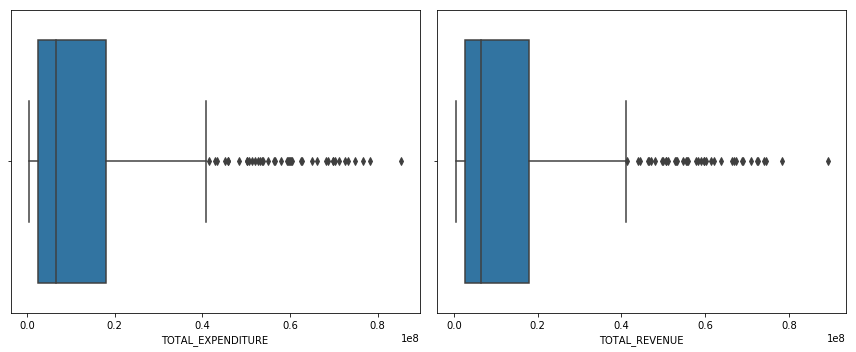

In [28]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(edu_df.TOTAL_EXPENDITURE)

plt.subplot(1,2,2)
sns.boxplot(edu_df.TOTAL_REVENUE)

plt.tight_layout()

2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

Expenditure MAX: 28495118.0
Revenue MAX: 28125598.0


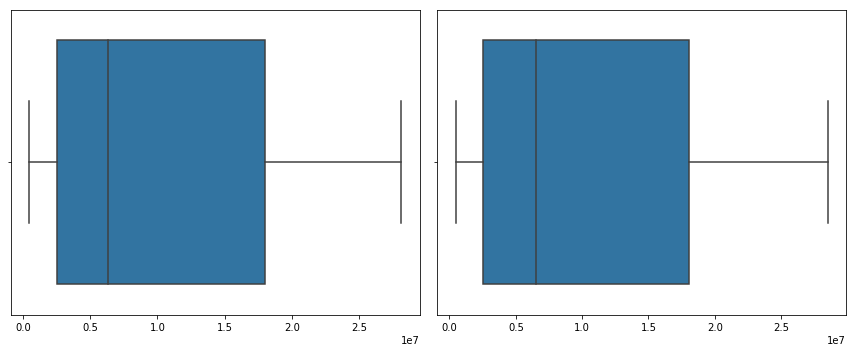

In [29]:
winsorized_revenue = winsorize(edu_df.TOTAL_REVENUE, (0,.05))
winsorized_expenditure = winsorize(edu_df.TOTAL_EXPENDITURE, (0,.05))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(winsorized_revenue)

plt.subplot(1,2,2)
sns.boxplot(winsorized_expenditure)

plt.tight_layout()


print('Expenditure MAX: {}'.format(winsorized_expenditure.max()))
print('Revenue MAX: {}'.format(winsorized_revenue.max()))

3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

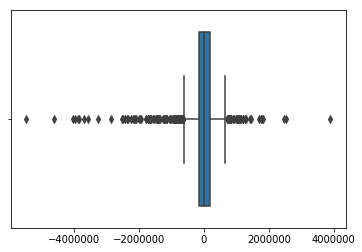

In [30]:
budget_deficit = edu_df.TOTAL_REVENUE - edu_df.TOTAL_EXPENDITURE
sns.boxplot(budget_deficit)

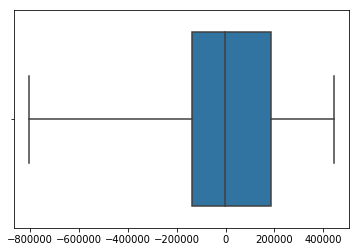

In [31]:
winsorize_budget = winsorize(budget_deficit, [.05,.05])

sns.boxplot(winsorize_budget, whis=5)

4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

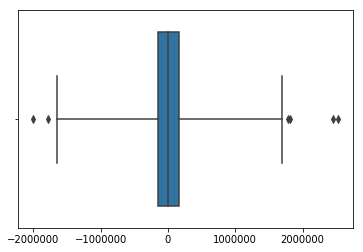

In [32]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure

sns.boxplot(budget_deficit2, whis=5)

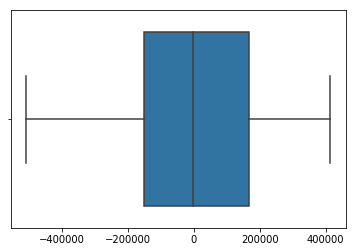

In [33]:
winsorize_budget2 = winsorize(budget_deficit2, (.05, .05))

sns.boxplot(winsorize_budget2, whis=5)

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [34]:
pd.DataFrame({"original_budget": budget_deficit, "winsorize_budget1": winsorize_budget,
              "winsorize_budget2": winsorize_budget2}).describe()

,original_budget,winsorize_budget1,winsorize_budget2
count,1.492000e+03,1492.000000,1492.000000
mean,-3.209622e+04,-5852.697051,5979.659517
std,5.607748e+05,315970.963721,268064.378117
min,-5.487742e+06,-803208.000000,-509360.000000
25%,-1.368148e+05,-136814.750000,-152551.500000
50%,-5.355000e+02,-535.500000,-3443.500000
75%,1.876285e+05,187628.500000,168423.500000
max,3.897129e+06,442351.000000,414013.000000


6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

first method = Cap budget deficit outliers only

second method= Cap revenue/expenditure and budget deficit outliers

The first method would be best since the revenue/expenditures outlier may be valuable in showing the differences in the budget deficit results. Some of the rows may have large expenditures and low revenue or vice versa. For example, if the outlier expenditure is capped at a specifc value then that row's budget deficit results is significantly different then the original and obviously inaccurate. As seen in the results dataframe above, these cases are likely the cause of the dramatic mean difference between the two methods. 

# Data Exploration #1

## Assignment

In [35]:
edu_df.dropna(inplace=True)
edu_df.isnull().sum()*100/edu_df.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [36]:
edu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1456.000000,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1.456000e+03,1.456000e+03,1.456000e+03,1456.000000,1456.000000,1456.000000,1456.000000
mean,2004.741071,1.005984e+06,1.126751e+07,9.066394e+05,4.979950e+06,5.380917e+06,1.129846e+07,5.871507e+06,3.370642e+06,5.004288e+05,1.049006e+06,16090.780563,58814.621566,59623.456044,59442.627747,50251.597527,4.796928e+05,2.286544e+05,7.472629e+05,233.076200,275.958375,219.129080,263.288772
std,7.218313,1.009158e+06,1.207573e+07,1.114991e+06,5.453728e+06,5.939856e+06,1.219924e+07,6.415787e+06,3.520831e+06,5.253843e+05,1.282479e+06,28935.570975,78272.187894,78481.925433,77360.808108,66653.453664,6.294572e+05,3.016698e+05,9.308698e+05,9.146337,8.578907,5.730024,5.031904
min,1992.000000,4.386600e+04,4.656500e+05,3.171400e+04,0.000000e+00,2.391700e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,181.626990,236.379102
25%,1999.000000,2.973995e+05,2.598676e+06,2.250838e+05,1.382799e+06,9.652915e+05,2.577423e+06,1.365708e+06,7.810895e+05,1.279618e+05,2.245848e+05,1547.000000,9862.500000,10052.750000,10088.000000,8815.750000,8.042375e+04,3.910525e+04,1.710098e+05,226.714885,270.286459,216.296555,260.450684
50%,2005.000000,7.540845e+05,6.575628e+06,5.308690e+05,3.196920e+06,2.742262e+06,6.650688e+06,3.427804e+06,1.965748e+06,3.415810e+05,6.632450e+05,5953.000000,38377.000000,38144.800000,38060.500000,33211.500000,3.080685e+05,1.466290e+05,4.585625e+05,234.479008,275.840360,219.823399,262.769840
75%,2011.000000,1.595024e+06,1.853620e+07,1.447408e+06,8.288798e+06,8.838075e+06,1.859778e+07,9.406610e+06,5.682262e+06,8.490842e+05,1.775732e+06,19809.500000,70679.000000,72258.250000,72515.000000,65308.750000,5.771392e+05,2.843505e+05,8.860948e+05,240.307421,282.866379,222.707026,266.910999
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


- Average math score is higher than the average reading score in both grades
- Average math score variables have higher std than average reading score variables
- Highest average expenditure is instruction expenditure

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

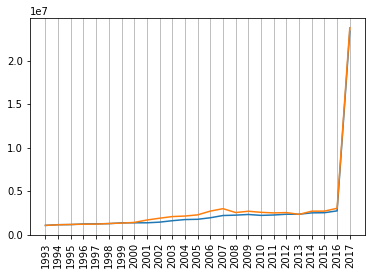

In [38]:
plt.plot(edu_df.YEAR.loc[edu_df.STATE == "HAWAII"], edu_df.TOTAL_EXPENDITURE.loc[edu_df.STATE == "HAWAII"])
plt.plot(edu_df.YEAR.loc[edu_df.STATE == "HAWAII"], edu_df.TOTAL_REVENUE.loc[edu_df.STATE == "HAWAII"])
plt.xticks(np.arange(edu_df.YEAR.loc[edu_df.STATE == "HAWAII"].min(), edu_df.YEAR.loc[edu_df.STATE == "HAWAII"].max() + 1, 1), rotation=90)
plt.grid(axis='x')

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [39]:
hawaii_df = edu_df[edu_df.STATE == "HAWAII"].copy()

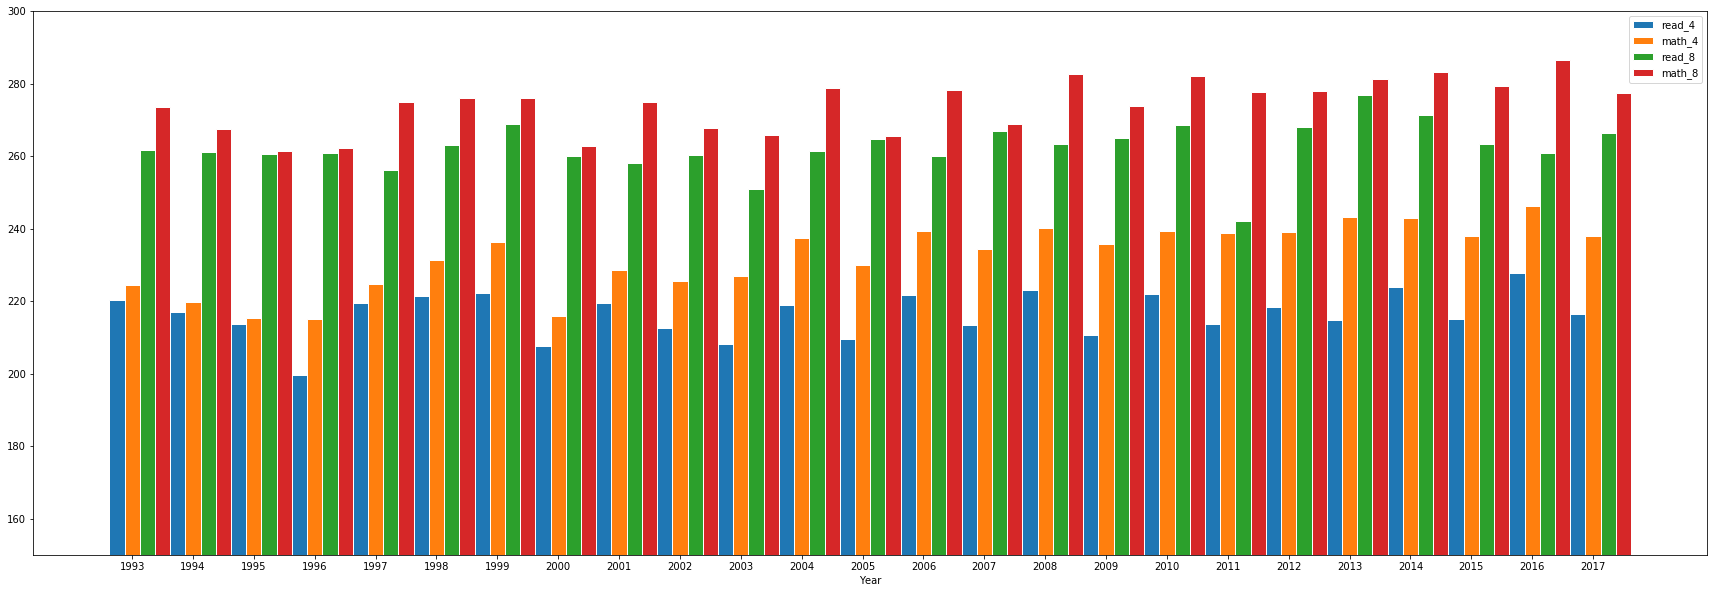

In [40]:
barWidth = 0.25
 

bars1 = hawaii_df['AVG_READING_4_SCORE']
bars2 = hawaii_df['AVG_MATH_4_SCORE']
bars3 = hawaii_df['AVG_READING_8_SCORE']
bars4 = hawaii_df['AVG_MATH_8_SCORE']
 

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(30,10))

plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='read_4')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='math_4')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='read_8')
plt.bar(r4, bars4, width=barWidth, edgecolor='white', label='math_8')

plt.xlabel('Year')
plt.xticks([r + barWidth for r in range(len(bars1))], list(hawaii_df.YEAR))

plt.ylim(150,300)
 

plt.legend()
plt.show()


In both grades, students are more sucessful in math. 

4. What are the distributions of the math and reading scores in the sample?

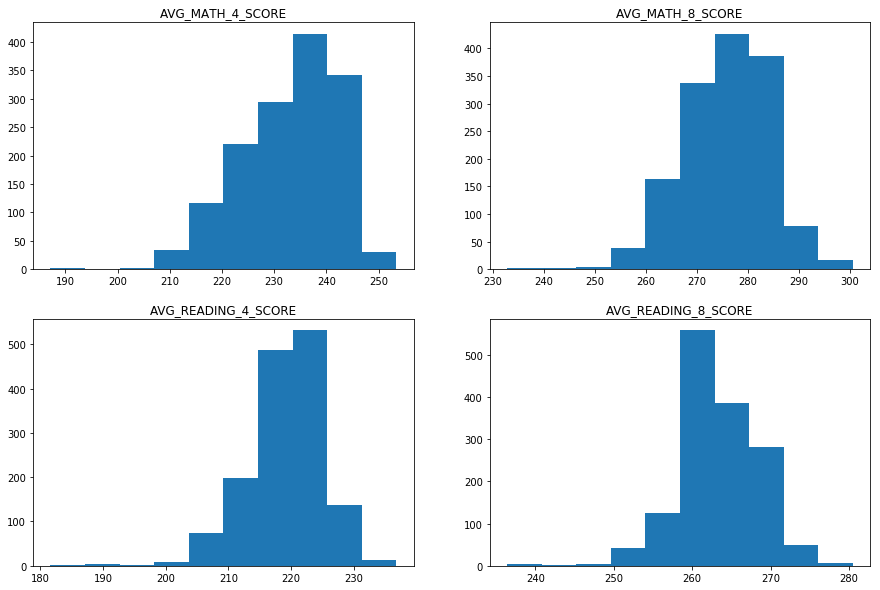

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(edu_df.AVG_MATH_4_SCORE)
plt.title('AVG_MATH_4_SCORE')

plt.subplot(2,2,2)
plt.hist(edu_df.AVG_MATH_8_SCORE)
plt.title('AVG_MATH_8_SCORE')

plt.subplot(2,2,3)
plt.hist(edu_df.AVG_READING_4_SCORE)
plt.title('AVG_READING_4_SCORE')

plt.subplot(2,2,4)
plt.hist(edu_df.AVG_READING_8_SCORE)
plt.title('AVG_READING_8_SCORE')

plt.show()
    

Math plots are skewed left. Reading 4 is normally distributed while reading 8 is skewed right. 

# Data Exploration #2

## Assignment

In [42]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [43]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [44]:
student_df.groupby('gender').mean()[['math score', 'reading score', 'writing score']]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [45]:
ttest_ind(student_df[student_df.gender == 'female'][['math score', 'reading score', 'writing score']],
          student_df[student_df.gender == 'male'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

Males score higher in math on average. T-test shows that the differences in scores between the two genders are significant. 

In [46]:
student_df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [50]:
race_groups = student_df['race/ethnicity'].unique()
for score in ['math score', 'reading score', 'writing score']:
    print('-------------------------')
    print(score)
    for i in range(0, len(race_groups)):
        for r in range(1, len(race_groups)):
            if i != r:
                print('t-test between {} and {}'.format(race_groups[i], race_groups[r]))
                t_score, p_val = ttest_ind(student_df[score][student_df['race/ethnicity'] == race_groups[i]],
                                           student_df[score][student_df['race/ethnicity'] == race_groups[r]])
                print('t-score: {} p-value: {}'.format(t_score, p_val))
                if p_val < .05:
                    print('*********************')
                    print('Significant difference between {} and {}'.format(race_groups[i], race_groups[r]))
                    print('*********************')

-------------------------
math score
t-test between group B and group C
t-score: -0.7315669893534263 p-value: 0.4647708939167453
t-test between group B and group A
t-score: 0.9355076279747488 p-value: 0.3503415961659957
t-test between group B and group D
t-score: -2.82845539712675 p-value: 0.004886197137104194
*********************
Significant difference between group B and group D
*********************
t-test between group B and group E
t-score: -6.007397050552227 p-value: 5.007946047497971e-09
*********************
Significant difference between group B and group E
*********************
t-test between group C and group A
t-score: 1.5997220303217299 p-value: 0.11043810745588042
t-test between group C and group D
t-score: -2.41858624746011 p-value: 0.015888349556016285
*********************
Significant difference between group C and group D
*********************
t-test between group C and group E
t-score: -6.127642520822135 p-value: 1.927238849552764e-09
*********************
Significa

In [48]:
student_df.groupby('parental level of education').mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [49]:
edu_group = student_df['parental level of education'].unique()
for score in ['math score', 'reading score', 'writing score']:
    print('-------------------------')
    print(score)
    for i in range(0, len(edu_group)):
        for r in range(1, len(edu_group)):
            if i != r:
                print('t-test between {} and {}'.format(edu_group[i], edu_group[r]))
                t_score, p_val = ttest_ind(student_df[score][student_df['parental level of education'] == edu_group[i]],
                                           student_df[score][student_df['parental level of education'] == edu_group[r]])
                print('t-score: {} p-value: {}'.format(t_score, p_val))
                if p_val < .05:
                    print('*********************')
                    print('Significant difference between {} and {}'.format(edu_group[i], edu_group[r]))
                    print('*********************')

-------------------------
math score
t-test between bachelor's degree and some college
t-score: 1.3702352829617477 p-value: 0.17151224218471559
t-test between bachelor's degree and master's degree
t-score: -0.14868196568849312 p-value: 0.8819757824867702
t-test between bachelor's degree and associate's degree
t-score: 0.8786641889793243 p-value: 0.38020757818036177
t-test between bachelor's degree and high school
t-score: 4.236143622484822 p-value: 2.9965345853843376e-05
*********************
Significant difference between bachelor's degree and high school
*********************
t-test between bachelor's degree and some high school
t-score: 3.196718602676573 p-value: 0.0015409192922812146
*********************
Significant difference between bachelor's degree and some high school
*********************
t-test between some college and master's degree
t-score: -1.2356334215824571 p-value: 0.21761956810347416
t-test between some college and associate's degree
t-score: -0.5426842696247527 p-v

t-test between associate's degree and high school
t-score: 5.348725635626432 p-value: 1.4650545536741998e-07
*********************
Significant difference between associate's degree and high school
*********************
t-test between associate's degree and some high school
t-score: 3.3317223453475715 p-value: 0.0009435990258795855
*********************
Significant difference between associate's degree and some high school
*********************
t-test between high school and some college
t-score: -4.488520877492127 p-value: 9.275017802620877e-06
*********************
Significant difference between high school and some college
*********************
t-test between high school and master's degree
t-score: -6.360904883721531 p-value: 9.326930296880332e-10
*********************
Significant difference between high school and master's degree
*********************
t-test between high school and associate's degree
t-score: -5.348725635626432 p-value: 1.4650545536741998e-07
*********************


2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [32]:
student_df.groupby('lunch').mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [54]:
lunch_group = student_df['lunch'].unique()
for score in ['math score', 'reading score', 'writing score']:
    print('-------------------------')
    print(score)
    for i in range(0, len(lunch_group)):
        for r in range(1, len(lunch_group)):
            if i != r:
                print('t-test between {} and {}'.format(lunch_group[i], lunch_group[r]))
                t_score, p_val = ttest_ind(student_df[score][student_df['lunch'] == lunch_group[i]],
                                           student_df[score][student_df['lunch'] == lunch_group[r]])
                print('t-score: {} p-value: {}'.format(t_score, p_val))
                if p_val < .05:
                    print('*********************')
                    print('Significant difference between {} and {}'.format(lunch_group[i], lunch_group[r]))
                    print('*********************')

-------------------------
math score
t-test between standard and free/reduced
t-score: 11.837180472914612 p-value: 2.4131955993137074e-30
*********************
Significant difference between standard and free/reduced
*********************
-------------------------
reading score
t-test between standard and free/reduced
t-score: 7.451056467473455 p-value: 2.0027966545279011e-13
*********************
Significant difference between standard and free/reduced
*********************
-------------------------
writing score
t-test between standard and free/reduced
t-score: 8.009784197834758 p-value: 3.186189583166477e-15
*********************
Significant difference between standard and free/reduced
*********************


There is a large significant difference between standard and free/reduced lunches across all test scores. Students who ate standard lunches were more successful with test results compared to students who ate free/reduced lunches.

3. Does the test preparation course seem to have an effect on the exam performances?

In [59]:
student_df.groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [34]:
test_prep_group = student_df['test preparation course'].unique()
for score in ['math score', 'reading score', 'writing score']:
    print('-------------------------')
    print(score)
    for i in range(0, len(test_prep_group)):
        for r in range(1, len(test_prep_group)):
            if i != r:
                print('t-test between {} and {}'.format(test_prep_group[i], test_prep_group[r]))
                t_score, p_val = ttest_ind(student_df[score][student_df['test preparation course'] == test_prep_group[i]],
                                           student_df[score][student_df['test preparation course'] == test_prep_group[r]])
                print('t-score: {} p-value: {}'.format(t_score, p_val))
                if t_score > .05 and p_val < .5:
                    print('*********************')
                    print('Significant difference between {} and {}'.format(test_prep_group[i], test_prep_group[r]))
                    print('*********************')

-------------------------
math score
t-test between none and completed
t-score: -5.704616417349102 p-value: 1.5359134607147415e-08
-------------------------
reading score
t-test between none and completed
t-score: -7.871663538941468 p-value: 9.081783336892205e-15
-------------------------
writing score
t-test between none and completed
t-score: -10.409173436808748 p-value: 3.68529173524572e-24


Looking at the p values between each of the test, there is a large significant difference between the test preparation sample and the no test preparation sample. Students who took completed the test preparation course had better test scores overall compared to students who didn't take the test preparation course. 

4. Which 2 exam scores are most correlated with each other?

In [35]:
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing scores had the strongest correlation. 

# Feature Engineering 1

variable: column from df
feature: transformed variable that is used for explaining target variable

normalization: Scale variable between the range of 0 and 1
standardization: Scale variable with a mean of 0 and std of 1. (no min/max value range)


Creating features:

Combine two highly correlated continous variables using averages of both.

PCA (Principal Component Analysis): Used to combine three or more correlated variable

## Assignment

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [36]:
student_df = student_df[student_df['math score'] > 1]

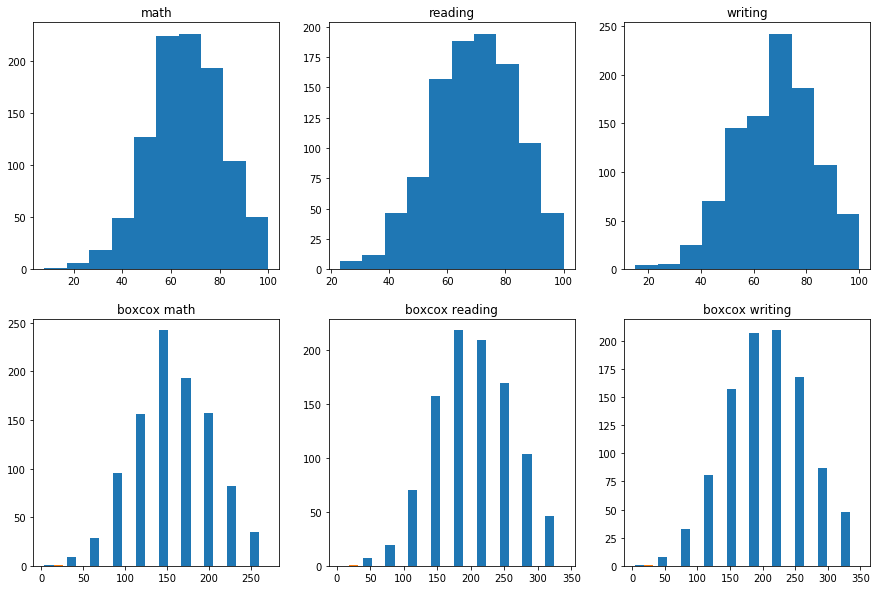

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.hist(student_df['math score'])
plt.title('math')

plt.subplot(2,3,2)
plt.hist(student_df['reading score'])
plt.title('reading')

plt.subplot(2,3,3)
plt.hist(student_df['writing score'])
plt.title('writing')

plt.subplot(2,3,4)
plt.hist(boxcox(student_df['math score']))
plt.title('boxcox math')

plt.subplot(2,3,5)
plt.hist(boxcox(student_df['reading score']))
plt.title('boxcox reading')

plt.subplot(2,3,6)
plt.hist(boxcox(student_df['writing score']))
plt.title('boxcox writing')

plt.show()

In [38]:
print('math:',jarque_bera(student_df['math score']))
print('math:',normaltest(student_df['math score']))
print()
print('reading:',jarque_bera(student_df['reading score']))
print('reading:',normaltest(student_df['reading score']))
print()
print('writing:',jarque_bera(student_df['writing score']))
print('writing:',normaltest(student_df['writing score']))
print()
box_math, _= boxcox(student_df[student_df["math score"] > 0]["math score"])
print('boxcox math:',jarque_bera(box_math))
print('boxcox math:',normaltest(box_math))
print()
box_reading,_ = boxcox(student_df['reading score'])
print('boxcox reading:',jarque_bera(box_reading))
print('boxcox reading:',normaltest(box_reading))
print()
box_writing,_ = boxcox(student_df['writing score'])
print('boxcox writing:',jarque_bera(box_writing))
print('boxcox writing:',normaltest(box_writing))

math: (7.673084457642435, 0.02156804993927408)
math: NormaltestResult(statistic=7.661032525153018, pvalue=0.021698410660350574)

reading: (9.776353497445086, 0.007535148427256777)
reading: NormaltestResult(statistic=9.673376920700841, pvalue=0.007933281978037242)

writing: (11.587461259316736, 0.003046595230866145)
writing: NormaltestResult(statistic=11.43053575430092, pvalue=0.0032952676764974485)

boxcox math: (1.720098104874378, 0.4231413256953709)
boxcox math: NormaltestResult(statistic=1.8323073377495822, pvalue=0.40005482895717037)

boxcox reading: (4.88915403217817, 0.08676282642086453)
boxcox reading: NormaltestResult(statistic=6.546500085398799, pvalue=0.037883105073765445)

boxcox writing: (5.762346713079429, 0.05606893537015201)
boxcox writing: NormaltestResult(statistic=8.018367650263817, pvalue=0.018148201299612785)


The original scores were not normally distributed in regards to a significance level threshold of .05. The boxcox transformed math score is normally distributed but the boxcox reading and writing score were not normally distributed according to the jarque bera test and normal test. 

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

AVG: (10.345394363749879, 0.0056692571616785425)
AVG: NormaltestResult(statistic=10.127189207749474, pvalue=0.006322790687068094)

boxcox AVG: (3.4323846909111793, 0.17974926966382276)
boxcox AVG: NormaltestResult(statistic=4.219879978703656, pvalue=0.12124524222064059)


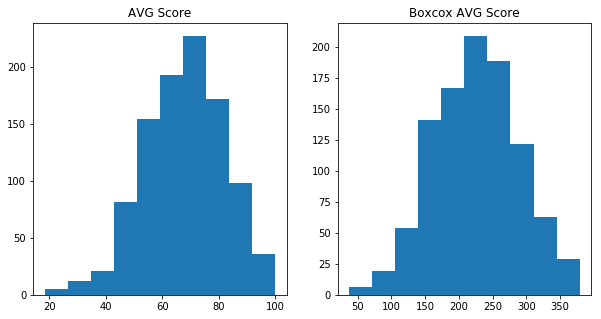

In [39]:
avg_score = (student_df['math score'] + student_df['reading score'] + 
             student_df['writing score'])/3
boxcox_avg_score,_ = boxcox(avg_score)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(avg_score)
plt.title('AVG Score')

plt.subplot(1,2,2)
plt.hist(boxcox_avg_score)
plt.title('Boxcox AVG Score')

print('AVG:', jarque_bera(avg_score))
print('AVG:', normaltest(avg_score))
print()
print('boxcox AVG:', jarque_bera(boxcox_avg_score))
print('boxcox AVG:', normaltest(boxcox_avg_score))

The combined score feature was not normally distributed and the boxcox combined score feature was normally distributed. 

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [40]:
student_df['avg_exam_score'] = (student_df['math score'] + student_df['reading score'] + 
             student_df['writing score'])/3

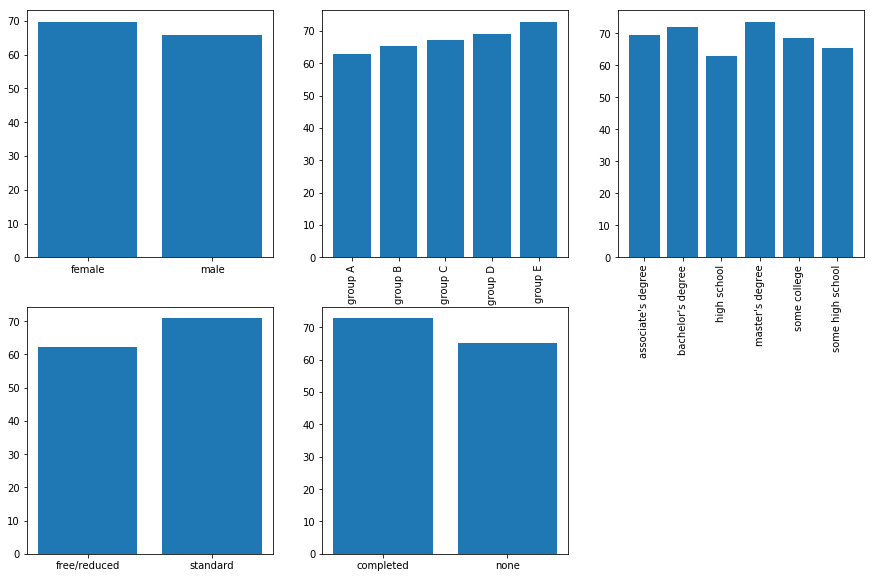

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.bar(student_df.groupby('gender')['avg_exam_score'].mean().index, student_df.groupby('gender')['avg_exam_score'].mean())

plt.subplot(2,3,2)
plt.bar(student_df.groupby('race/ethnicity')['avg_exam_score'].mean().index, student_df.groupby('race/ethnicity')['avg_exam_score'].mean())
plt.xticks(rotation=90)

plt.subplot(2,3,3)
plt.bar(student_df.groupby("parental level of education")
        ["avg_exam_score"].mean().index, student_df.groupby("parental level of education")["avg_exam_score"].mean())
plt.xticks(rotation=90)

plt.subplot(2,3,4)
plt.bar(student_df.groupby("lunch")
        ["avg_exam_score"].mean().index, student_df.groupby("lunch")["avg_exam_score"].mean())

plt.subplot(2,3,5)
plt.bar(student_df.groupby("test preparation course")
        ["avg_exam_score"].mean().index, student_df.groupby("test preparation course")["avg_exam_score"].mean())


plt.show()

In [42]:
for col in student_df.columns[:5]:
    diff = student_df.groupby(col)['avg_exam_score'].mean().max() - student_df.groupby(col)['avg_exam_score'].mean().min()
    print('Difference between {} max and min values: {}'.format(col, diff))

Difference between gender max and min values: 3.849171060833484
Difference between race/ethnicity max and min values: 9.759871589085108
Difference between parental level of education max and min values: 10.501931280986966
Difference between lunch max and min values: 8.487868436035619
Difference between test preparation course max and min values: 7.543094908153833


- Females performed better on test scores than males
- Group E race ethnicity performed the best on test scores compared to other groups. The test scores gradually decrease from Group E to Group A. 
- Students who have parent with higher levels of education perform better on test scores. Although students with parents who took some high school performed better than students with parents who completed high school. 
- Standard lunch students perform better on test scores than free/reduced lunch students
- Students who took the test preparation course performed better than student who didn't take the test preparation course

Overall all these features could be used to explain the success of test scores. The race/ethinicity and lunch variable should be used cautiously since there may be more uncontrolled variables within them (e.g. each of the lunches between standard and free/reduced could vary).


# Feature Engineering 2: Dimensionality

Curse of dimensionality: More features used in model equals more combinations of dimensions. Ultimately this leads to excessive computational resources and possible overfitting. 

Solution: Narrow down features to use using different features selection methods.

Feature selection methods:

Filter method:

Give each feature a score depending on a metric independently or dependent on outcome variable. Rank feature by score and if feature doesn't pass a specific threshold then remove feature from feature selection list. Possible thresholds include variance threshold and correlation to outcome threshold. Filter methods are used as the first level of feature selection.

Wrapper method:

Features evaluated in sets in regards to their predictive strength used in the model. 

Foward pass: Add features to model individually to see how each feature strengthen/weakens model

Backward pass: Start with adding all features to model and remove each feature individually

Variance Formula:

The variance of x is the sum of the squared differences between each value in x ($x_i$) and the mean of x ($\bar{x}$) divided by the sample size (*n*).

$$var(x)=\frac{\sum(x_i-\bar{x})^2}n$$

STD:

$\sqrt{var(x)}$)


Covariance between two variables x and y is the product of the differences of each variable value and its mean divided by the sample size.

$$cov(A)=\sum\frac{(x_i-\bar{x})(y_i-\bar{y})}n$$

PCA Process:

1. Move data to where mean point equals origin but keeping the distance from each point the same
2. Find best fit line in relation to all points. 
    - Project point onto line creating a right angle from point to line to origin. Measure distance from projected point on line to origin. Sum up squared distances of all points.
    - Eigen Value: Best fit line value or line with the largest Sum squared distance 
2. Eigen Vector: distance of the line at one unit. Use of the slope of the line at one unit and pythagorean theorem to find Eigen vector for PC1.
3. Scale slope by dividing slope by eigen vector and so eigen vector is scaled to 1
4. PC2: Perpendicular line to PC1
5. Rotate axis using PC1 line as x and PC2 as y
6. PC1/PC2 variance: Calculate new eigen values for PC1 and PC2 divided by total sample size -1 (separately)
6. Get variance percentage from PC1/PC2 variance above

1. Create a new score variable from the weighted averages of all score variables in the datasets. **Notice that the number of students in the 4th grade isn't the same as the number of students in the 8th grade. So, you should appropriately weigh the scores!**.

In [52]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
36,2001_WYOMING,WYOMING,2001,89711.0000,804297.0,69172.0,403021.0,332104.0,787949.0,426072.0,...,6587.0,7211.0,6855.0,53091.0,29035.0,1098988.5,219.515870,268.128094,221.250787,261.870243
37,1992_OKLAHOMA,OKLAHOMA,1992,129586.3125,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,...,48793.0,44163.0,33346.0,387659.0,157824.0,550342.0,220.319806,268.131990,219.256638,261.861030
38,1992_OREGON,OREGON,1992,169461.6250,2773959.0,163544.0,788309.0,1822106.0,2898210.0,1556770.0,...,41443.0,39610.0,31920.0,325128.0,144002.0,469901.0,222.312769,269.755214,217.262490,261.851817
39,1992_PENNSYLVANIA,PENNSYLVANIA,1992,209336.9375,11257252.0,658139.0,4227323.0,6371790.0,11539253.0,6075381.0,...,131248.0,126293.0,108244.0,1063552.0,486354.0,1554322.0,224.305732,271.378439,215.268341,261.842604
40,1992_RHODE_ISLAND,RHODE_ISLAND,1992,249212.2500,883073.0,43545.0,329810.0,509718.0,863404.0,556787.0,...,11129.0,10204.0,8244.0,90758.0,37931.0,129187.0,215.449248,265.907109,219.940098,261.833392


In [57]:
edu_df["overall_score"] = (edu_df["GRADES_4_G"]*((edu_df["AVG_MATH_4_SCORE"] + edu_df["AVG_READING_4_SCORE"])*0.5) + edu_df["GRADES_8_G"]
                                 * ((edu_df["AVG_MATH_8_SCORE"] + edu_df["AVG_READING_8_SCORE"])*0.5))/(edu_df["GRADES_4_G"] + edu_df["GRADES_8_G"])

In [58]:
edu_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,total_score,overall_score
36,2001_WYOMING,WYOMING,2001,89711.0000,804297.0,69172.0,403021.0,332104.0,787949.0,426072.0,...,6855.0,53091.0,29035.0,1098988.5,219.515870,268.128094,221.250787,261.870243,243.700100,243.700100
37,1992_OKLAHOMA,OKLAHOMA,1992,129586.3125,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,...,33346.0,387659.0,157824.0,550342.0,220.319806,268.131990,219.256638,261.861030,241.266487,241.266487
38,1992_OREGON,OREGON,1992,169461.6250,2773959.0,163544.0,788309.0,1822106.0,2898210.0,1556770.0,...,31920.0,325128.0,144002.0,469901.0,222.312769,269.755214,217.262490,261.851817,242.275252,242.275252
39,1992_PENNSYLVANIA,PENNSYLVANIA,1992,209336.9375,11257252.0,658139.0,4227323.0,6371790.0,11539253.0,6075381.0,...,108244.0,1063552.0,486354.0,1554322.0,224.305732,271.378439,215.268341,261.842604,242.748345,242.748345
40,1992_RHODE_ISLAND,RHODE_ISLAND,1992,249212.2500,883073.0,43545.0,329810.0,509718.0,863404.0,556787.0,...,8244.0,90758.0,37931.0,129187.0,215.449248,265.907109,219.940098,261.833392,239.781374,239.781374


2. What are the correlations between this newly created score variable and the expenditure types? Which 1 of the expenditure types is more correlated than the others?

In [65]:
edu_df.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,total_score,overall_score
YEAR,1.000000,0.062917,0.232782,0.261676,0.215743,0.226040,0.226742,0.226133,0.242488,0.208939,0.160018,0.077355,-0.050487,-0.059041,-0.050624,0.007154,-0.058437,-0.026438,-0.029998,0.674856,0.488403,0.307526,0.321604,0.568782,0.568782
ENROLL,0.062917,1.000000,0.904767,0.899512,0.917091,0.828506,0.908706,0.878103,0.899910,0.950130,0.922165,0.664636,0.828393,0.829775,0.828240,0.816827,0.829586,0.828092,0.839255,0.104186,0.079309,0.052226,0.002894,0.058335,0.058335
TOTAL_REVENUE,0.232782,0.904767,1.000000,0.926533,0.970672,0.967847,0.998964,0.991796,0.994877,0.951626,0.918302,0.505420,0.616488,0.618948,0.625601,0.650264,0.619681,0.640461,0.640327,0.282012,0.221241,0.177095,0.059135,0.210755,0.210755
FEDERAL_REVENUE,0.261676,0.899512,0.926533,1.000000,0.927105,0.844699,0.929122,0.898080,0.923374,0.949632,0.913647,0.598658,0.695385,0.691181,0.698942,0.735711,0.691939,0.716605,0.708199,0.259208,0.184426,0.106256,0.070231,0.183412,0.183412
STATE_REVENUE,0.215743,0.917091,0.970672,0.927105,1.000000,0.881189,0.970250,0.956442,0.962163,0.955037,0.919893,0.492859,0.678424,0.679495,0.685846,0.715198,0.679496,0.702682,0.690245,0.248335,0.189878,0.135978,0.050748,0.181646,0.181646
LOCAL_REVENUE,0.226040,0.828506,0.967847,0.844699,0.881189,1.000000,0.965643,0.969575,0.965837,0.879521,0.850798,0.462621,0.499887,0.504693,0.510932,0.527219,0.506040,0.522367,0.535092,0.296662,0.240826,0.215239,0.060444,0.227256,0.227256
TOTAL_EXPENDITURE,0.226742,0.908706,0.998964,0.929122,0.970250,0.965643,1.000000,0.992698,0.992435,0.951726,0.928129,0.521345,0.631173,0.633886,0.640991,0.664947,0.634771,0.655761,0.655146,0.273678,0.213592,0.168655,0.059089,0.204239,0.204239
INSTRUCTION_EXPENDITURE,0.226133,0.878103,0.991796,0.898080,0.956442,0.969575,0.992698,1.000000,0.979165,0.920297,0.895527,0.483764,0.598536,0.601436,0.608275,0.630942,0.602412,0.623196,0.622992,0.272922,0.214106,0.178438,0.063929,0.207131,0.207131
SUPPORT_SERVICES_EXPENDITURE,0.242488,0.899910,0.994877,0.923374,0.962163,0.965837,0.992435,0.979165,1.000000,0.953411,0.905265,0.488686,0.594322,0.596081,0.602859,0.629567,0.596785,0.617906,0.618488,0.297247,0.234483,0.186897,0.062177,0.221824,0.221824
OTHER_EXPENDITURE,0.208939,0.950130,0.951626,0.949632,0.955037,0.879521,0.951726,0.920297,0.953411,1.000000,0.923468,0.566813,0.703969,0.701474,0.705758,0.724141,0.701913,0.716438,0.716233,0.240339,0.180842,0.130526,0.047756,0.169775,0.169775


Support services expenditure has the strongest positive correlation with total scores

3. Now, apply PCA to the 4 expenditure types. How much of the total variance is explained by the 1st component?

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

expend_col = edu_df[['INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE',
                     'CAPITAL_OUTLAY_EXPENDITURE','OTHER_EXPENDITURE']]

expend_col = StandardScaler().fit_transform(expend_col)

pca = PCA(n_components=1)

edu_df['PCA'] = pca.fit_transform(expend_col)

print('PC1: ',pca.explained_variance_ratio_)
print('PC2: ', 1 - pca.explained_variance_ratio_)

PC1:  [0.94725496]
PC2:  [0.05274504]


PC1 accounts for 94% of the total variance and PC2 accounts for 5% of the total variance.

4. What is the correlation between the overall score variable and the 1st principal component? 

In [70]:
edu_df.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,total_score,overall_score,PCA
YEAR,1.000000,0.062917,0.232782,0.261676,0.215743,0.226040,0.226742,0.226133,0.242488,0.208939,0.160018,0.077355,-0.050487,-0.059041,-0.050624,0.007154,-0.058437,-0.026438,-0.029998,0.674856,0.488403,0.307526,0.321604,0.568782,0.568782,0.215476
ENROLL,0.062917,1.000000,0.904767,0.899512,0.917091,0.828506,0.908706,0.878103,0.899910,0.950130,0.922165,0.664636,0.828393,0.829775,0.828240,0.816827,0.829586,0.828092,0.839255,0.104186,0.079309,0.052226,0.002894,0.058335,0.058335,0.937501
TOTAL_REVENUE,0.232782,0.904767,1.000000,0.926533,0.970672,0.967847,0.998964,0.991796,0.994877,0.951626,0.918302,0.505420,0.616488,0.618948,0.625601,0.650264,0.619681,0.640461,0.640327,0.282012,0.221241,0.177095,0.059135,0.210755,0.210755,0.990886
FEDERAL_REVENUE,0.261676,0.899512,0.926533,1.000000,0.927105,0.844699,0.929122,0.898080,0.923374,0.949632,0.913647,0.598658,0.695385,0.691181,0.698942,0.735711,0.691939,0.716605,0.708199,0.259208,0.184426,0.106256,0.070231,0.183412,0.183412,0.946471
STATE_REVENUE,0.215743,0.917091,0.970672,0.927105,1.000000,0.881189,0.970250,0.956442,0.962163,0.955037,0.919893,0.492859,0.678424,0.679495,0.685846,0.715198,0.679496,0.702682,0.690245,0.248335,0.189878,0.135978,0.050748,0.181646,0.181646,0.974553
LOCAL_REVENUE,0.226040,0.828506,0.967847,0.844699,0.881189,1.000000,0.965643,0.969575,0.965837,0.879521,0.850798,0.462621,0.499887,0.504693,0.510932,0.527219,0.506040,0.522367,0.535092,0.296662,0.240826,0.215239,0.060444,0.227256,0.227256,0.942012
TOTAL_EXPENDITURE,0.226742,0.908706,0.998964,0.929122,0.970250,0.965643,1.000000,0.992698,0.992435,0.951726,0.928129,0.521345,0.631173,0.633886,0.640991,0.664947,0.634771,0.655761,0.655146,0.273678,0.213592,0.168655,0.059089,0.204239,0.204239,0.992988
INSTRUCTION_EXPENDITURE,0.226133,0.878103,0.991796,0.898080,0.956442,0.969575,0.992698,1.000000,0.979165,0.920297,0.895527,0.483764,0.598536,0.601436,0.608275,0.630942,0.602412,0.623196,0.622992,0.272922,0.214106,0.178438,0.063929,0.207131,0.207131,0.975096
SUPPORT_SERVICES_EXPENDITURE,0.242488,0.899910,0.994877,0.923374,0.962163,0.965837,0.992435,0.979165,1.000000,0.953411,0.905265,0.488686,0.594322,0.596081,0.602859,0.629567,0.596785,0.617906,0.618488,0.297247,0.234483,0.186897,0.062177,0.221824,0.221824,0.986139
OTHER_EXPENDITURE,0.208939,0.950130,0.951626,0.949632,0.955037,0.879521,0.951726,0.920297,0.953411,1.000000,0.923468,0.566813,0.703969,0.701474,0.705758,0.724141,0.701913,0.716438,0.716233,0.240339,0.180842,0.130526,0.047756,0.169775,0.169775,0.975451


Correlation between total score and PCA is 19%.

5. If you were to choose the best variables for your model, would you prefer using the 1st principal component instead of the expenditure variables? Why?

I would use the expenditure variables because they correlated better than PCA. The only expenditure that correlated less than PCA was the other expenditure variable. 

# Modeling Purpose

## Assignment

1. Try to model the result of a coin toss. In your model, include any features that you think important in explaining the result. Discuss with your mentor about the pros and cons of adding too many features into your model.

Since the target outcome is a binary classification, using a classifer model is needed. 

Features for modeling:

- Force used to flip coin
- Fingernail position on coin
- Coin toss angle
- Height of surface coin lands on
- Coin weight

Pros of excessive features:

Predicts very accurate results if the input features are similar to training features

Smaller features contribute to prediction

Cons:

More likely to overfit to training features/unable to generalize

Computationally more expensive


2. If you ever used Netflix, you should already have realized that it provides some recommendations for you to watch. In data science, this is an example of the so-called **recommendations systems**. Read this nontechnical blog post of [Netflix](https://help.netflix.com/en/node/100639) about how they model their recommendations systems. Then, derive the features they use in their recommendations engines and discuss what else can be incorporated into this model. 

Possible Features:

- Youtube history: If the user watches a specific type of video on youtube they may want to watch similar films or tv shows. (e.g. watching rock climbing videos on youtube = recommending rock climbing films on netflix)

- Previous movie themes/moral sentiment: Each movie stores keywords that represent the theme or moral of the story. If the user continues to watch movie relating to a specific theme, then recommending movies with the similar theme may be useful. If the movie presents an argument about a subject then maybe recommending a movie that provides a counter argument or another perspective on the topic (this would be applied probably to documentaries)